In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/LENOVO/Desktop/MLLAB/pr4/archive3/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df['Chance of Admit ']=[1 if each > 0.85 else 0 for each in df['Chance of Admit ']]
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


In [7]:
x=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=df['Chance of Admit ']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [10]:
print("Size of splitting data:")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitting data:
x_train (375, 7)
y_train (375,)
x_test (125, 7)
y_test (125,)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
model_dt=DecisionTreeClassifier(random_state=1)

In [13]:
model_rf=RandomForestClassifier(random_state=1)

In [14]:
model_lr=LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [15]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [16]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [17]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [18]:
y_pred_dt=model_dt.predict(x_test)
y_pred_rf=model_rf.predict(x_test)
y_pred_lr=model_lr.predict(x_test)

In [26]:
y_pred_rf=[1 if each > 0.75 else 0 for each in y_pred_rf]

In [38]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

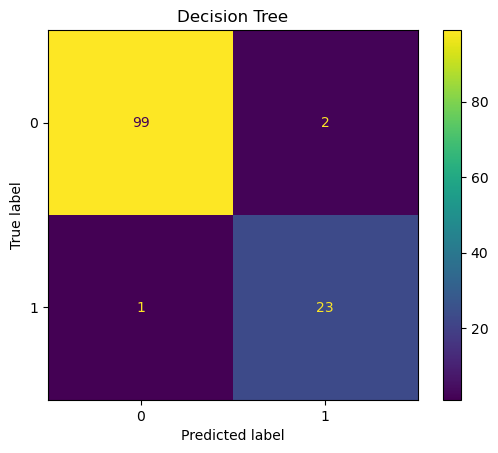

Accuracy is 0.976
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.92      0.96      0.94        24

    accuracy                           0.98       125
   macro avg       0.96      0.97      0.96       125
weighted avg       0.98      0.98      0.98       125



In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title("Decision Tree")
plt.show()
print(f"Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

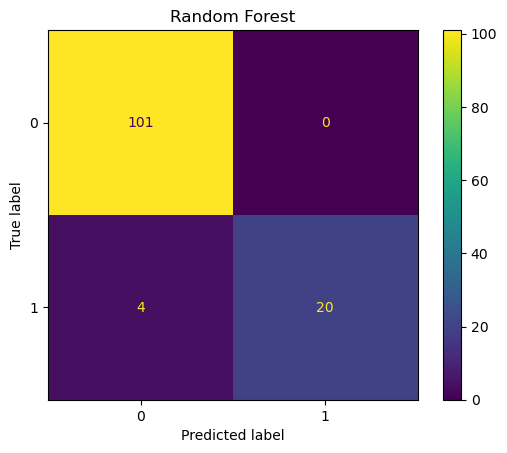

Accuracy is 0.968
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.83      0.91        24

    accuracy                           0.97       125
   macro avg       0.98      0.92      0.94       125
weighted avg       0.97      0.97      0.97       125



In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title("Random Forest")
plt.show()
print(f"Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

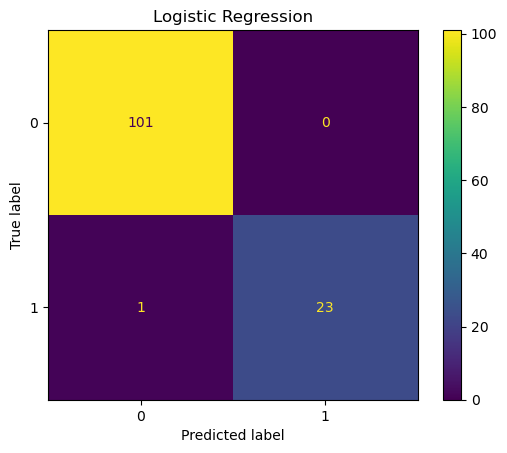

Accuracy is 0.992
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.96      0.98        24

    accuracy                           0.99       125
   macro avg       1.00      0.98      0.99       125
weighted avg       0.99      0.99      0.99       125



In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title("Logistic Regression")
plt.show()
print(f"Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))